PTH and PTH_FC data analysis 

Part one: importing the data

In [1]:
import pandas as pd
import csv
import string
import numpy as np
import matplotlib.pyplot as plt #for plotting

In [2]:
class Run:
    def __init__(self,name="",protein="",concentration=0,model="oneToone",t=[],r=[]):
        self.name = name 
        self.protein = protein 
        self.concentration = concentration
        self.model = model 
        self.t = t 
        self.r = r 
    

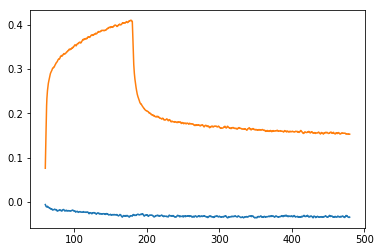

In [3]:
#I used to have a program that makes the file list, but I somehow lost it...
#I don't know what is going on with regards to that 
fileList = ['C:/Users/dexte/Desktop/pdata/A1.xls', 'C:/Users/dexte/Desktop/pdata/A2.xls', 'C:/Users/dexte/Desktop/pdata/A3.xls', 'C:/Users/dexte/Desktop/pdata/A4.xls', 'C:/Users/dexte/Desktop/pdata/B1.xls', 'C:/Users/dexte/Desktop/pdata/B2.xls', 'C:/Users/dexte/Desktop/pdata/B3.xls', 'C:/Users/dexte/Desktop/pdata/B4.xls', 'C:/Users/dexte/Desktop/pdata/C1.xls', 'C:/Users/dexte/Desktop/pdata/C2.xls', 'C:/Users/dexte/Desktop/pdata/C3.xls', 'C:/Users/dexte/Desktop/pdata/C4.xls', 'C:/Users/dexte/Desktop/pdata/D1.xls', 'C:/Users/dexte/Desktop/pdata/D2.xls', 'C:/Users/dexte/Desktop/pdata/D3.xls', 'C:/Users/dexte/Desktop/pdata/D4.xls', 'C:/Users/dexte/Desktop/pdata/E1.xls', 'C:/Users/dexte/Desktop/pdata/E2.xls', 'C:/Users/dexte/Desktop/pdata/E3.xls', 'C:/Users/dexte/Desktop/pdata/E4.xls', 'C:/Users/dexte/Desktop/pdata/F1.xls', 'C:/Users/dexte/Desktop/pdata/F2.xls', 'C:/Users/dexte/Desktop/pdata/F3.xls', 'C:/Users/dexte/Desktop/pdata/F4.xls', 'C:/Users/dexte/Desktop/pdata/F4.xls', 'C:/Users/dexte/Desktop/pdata/G1.xls', 'C:/Users/dexte/Desktop/pdata/G3.xls', 'C:/Users/dexte/Desktop/pdata/H1.xls', 'C:/Users/dexte/Desktop/pdata/H3.xls']
#make a file list 
isFc = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,0, 0, 1,0,1]

t_array = []
r_array = []
run_array = []
conc_array = []
run_num = 0
for file in fileList:
    with open(file,'r') as csvFile:
        rowNum = 1 
        fReader = csv.reader(csvFile)
        conc = 0 
        t = []
        r = []
        for row in fReader:
            if(rowNum==2):
                conc = row[0].split("\t")[1]
            if(rowNum >= 6): 
                t.append(float(row[0].split("\t")[0]))
                r.append(float(row[0].split("\t")[1]))


            rowNum = rowNum + 1 
    t_array.append(t)
    r_array.append(r)
    conc_array.append(conc)
    
    if(isFc[run_num]):
        protein_name = "PTH-Fc"
    else:
        protein_name = "PTH"
    
    tmpRun = Run(str(run_num),protein_name,conc,"oneToone",t,r)
    run_array.append(tmpRun)
    
    run_num = run_num + 1 

plt.plot(tmpRun.t,tmpRun.r,t_array[3],r_array[4],'-')

0 1E-05
4 6.7E-06
8 4.4E-06
12 3E-06
16 2E-06
20 1.3E-06
25 8.8E-07
0.52667905


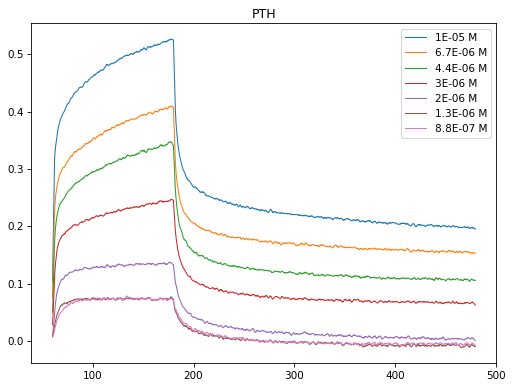

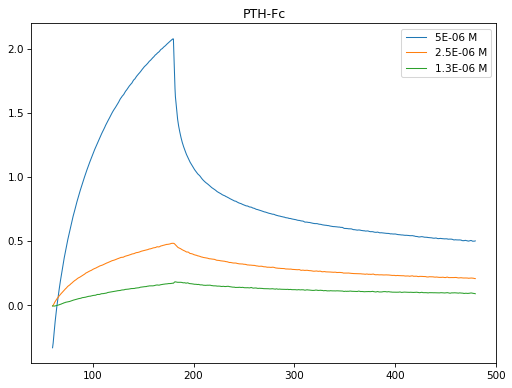

In [82]:
k=0
for run in run_array:
    if(run.protein == "PTH-Fc" and np.max(run.r)>0.07):
        plt.figure(1,figsize=(8, 6), dpi=75, facecolor='w', edgecolor='k')
        conc = run.concentration
        plt.plot(run.t,run.r,'-',linewidth=1,label=str(conc) + " M")
        plt.legend()
        plt.title("PTH-Fc")
    if(run.protein=="PTH" and np.max(run.r)>0.07):
        plt.figure(2,figsize=(8, 6), dpi=75, facecolor='w', edgecolor='k')
        conc = run.concentration
        plt.plot(run.t,run.r,'-',linewidth=1,label=str(conc) + " M")
        plt.legend()
        plt.title("PTH")
        print(k,conc)
    k=k+1

#plt.figure(1)
i = np.max(run_array[0].r)
print(i)

max_value = max(run_array[0].r)
max_index = run_array[0].r.index(max_value)
max_time = run_array[0].t[max_index]
tmax = max_time 

#print(i,j)

Now we are going to get involved in fitting!
First we will do the one-to-one fitting.
The one to one fitting follows the following model:  
$L+A \underset{k_a}{\stackrel{k_d}{\rightleftharpoons}} LA$
The differential equations for this model are:

$\begin{equation}
\frac{d[L]}{dt} = - (k_a[L][A]-k_d[LA])
\end{equation}$

$\begin{equation}
\frac{d[LA]}{dt}=k_a[L][A]-k_d[LA]
\end{equation}$

The integrated equations that we will be fitting to the models are shown below 

$R = R_{eq}(1-e^{-(k_aC+k_d)(t-t_0)})$

$R=R_0e^{-k_d(t-t_0)}$

$R_{eq} = \frac{k_aC}{k_aC+k_d}R_{max}$

$R_{max} = max response$

So the variables varried in the fit are $R_{max}$, $k_d$ and $k_a$

<class 'float'>
Parameters([('kd', <Parameter 'kd', value=0.13393797405549135 +/- nan, bounds=[0:inf]>), ('ka', <Parameter 'ka', value=0.12685931669479844 +/- nan, bounds=[0:inf]>), ('Rmax', <Parameter 'Rmax', value=87550.06263863776 +/- nan, bounds=[-inf:inf]>)])


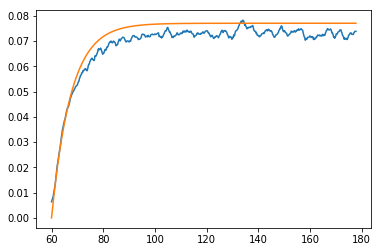

In [104]:
from lmfit import minimize, Parameters
#paramaters are 
params = Parameters()
params.add("kd",value=0.0002,min=0)
params.add("ka",value=0.00002,min=0)
params.add("Rmax",value=1000) 

tmpRun = run_array[25]
tp = np.array(tmpRun.t[0:max_index])
rp = np.array(tmpRun.r[0:max_index])
A0 = float(tmpRun.concentration)
print(type(A0))
t0 = tp[0]
plt.plot(tp,rp,'-')

def residual(params,t,Rdata,A0,t0):
    kd = params["kd"]
    ka = params["ka"]
    Rmax = params["Rmax"]
    Req = (ka*A0)/(ka*A0+kd)*Rmax 
    Rest = Req*(1-np.exp(-(ka*A0+kd)*(t-t0)))
    #Rest = Req*(1 - np.exp(-(ka*A0+kd)*(t-t0))  )
    #print(Req)
    #print(Rest-Rdata)
    return Rest-Rdata

out = minimize(residual, params, args=(tp, rp, A0,t0) ,method="leastsquares")
ka = out.params["kd"].value
kd = out.params["kd"].value
Rmax = out.params["Rmax"].value 
Req = (ka*A0)/(ka*A0+kd)*Rmax

Rest = Req*(1-np.exp(-(ka*A0+kd)*(tp-t0)))

plt.plot(tp,Rest,'-')
print(out.params)